# Introduction to the class Nescience

In this tutorial we are going to see how to use the class "Nescience", in order to compute the nescience of a model and a dataset, and to compute the individual terms that compose the nescience, that is, miscoding, inaccuracy and surfeit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 20, 10

For the examples we are going to use the breast cancer dataset. Mind that in the current version the Nescience class can be applied only in case of classification problems with continuous features.

In [3]:
from sklearn.datasets import load_breast_cancer

We will apply the nescience class to decision tree classifier models and multilayer perceptron models.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

Finally we import the Nescience class.

In [5]:
from Nescience.Nescience import *

## Miscoding

#### Target Conditional Complexity

The target conditional complexity measures the effort required to encode the target variable assuming the knowledge of a feature. The higher this value, the better, since that means the feature contains more information about the target.

We will use a synthetic dataset to show how this method works. We will randomly generate four clouds of points classified according to ten features among which only four are relevant.

In [6]:
from sklearn.datasets.samples_generator import make_classification

In [7]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=4, n_redundant=0, n_repeated=0, n_classes=4, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)

We have to initialize the class Nescience with the dataset we are going to use.

In [8]:
nescience = Nescience(X, y, verbose=True)

Computing optimal codes ... done!
Computing miscoding ... done!


Let's get the target conditional complexity with respect to all the features.

In [9]:
tcc = nescience.targetconditionalcomplexity()
tcc

array([0.02390238, 0.02232701, 0.02129829, 0.02132389, 0.02317516,
       0.24086956, 0.15724648, 0.02033484, 0.02859811, 0.01850099,
       0.01562849, 0.13001501, 0.01448534, 0.02431025, 0.02073056,
       0.02530215, 0.13286182, 0.01971741, 0.01882615, 0.02054609])

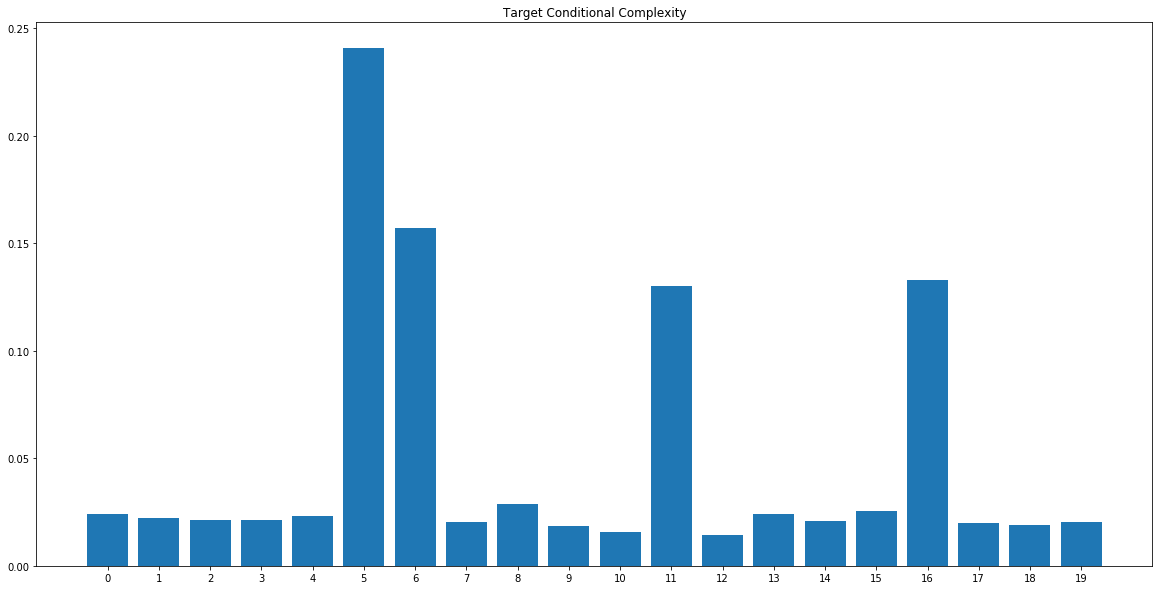

In [10]:
plt.bar(x=np.arange(0, 20), height=tcc, tick_label=np.arange(0, 20))
plt.title("Target Conditional Complexity")
plt.show()

There are clearly four features that have some "predictive" power over the target variable. A value close to 1 means more predictive power.

Let's compare with a classical correlation schema.

In [11]:
df = pd.DataFrame(X)
df['y'] = y
corr = df.corr()

Text(0.5,1,'By Correlation')

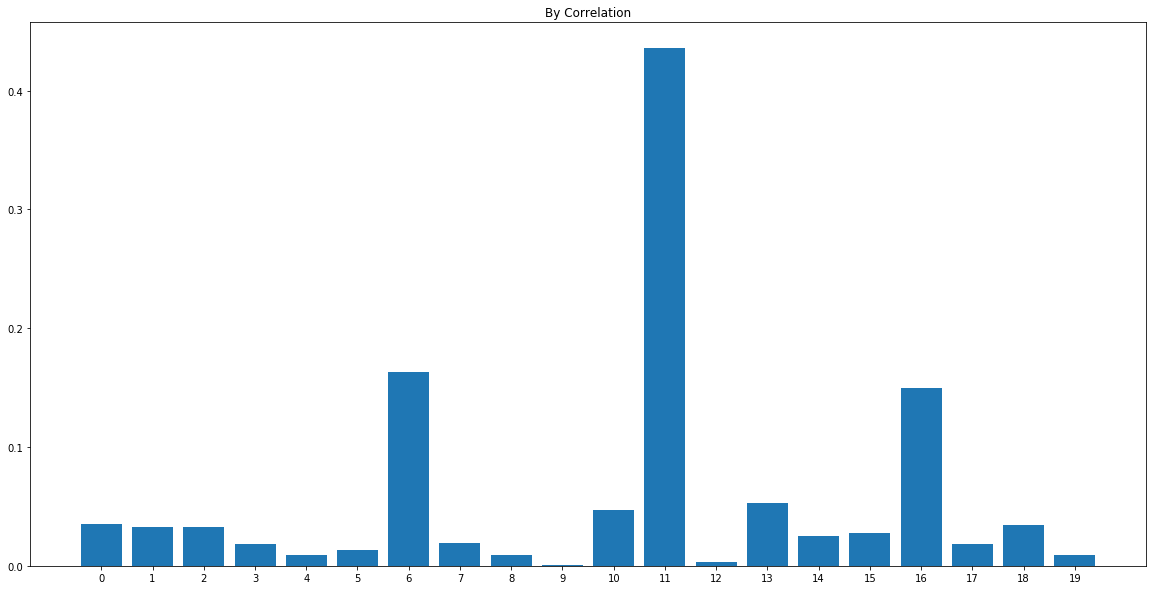

In [12]:
plt.bar(x=np.arange(0, 20), height=abs(corr['y'][:-1].values), tick_label=np.arange(0, 20))
plt.title("By Correlation")

In this case, there are three clear features correlated with the target variable, however, it is not clear if there is a fourth one (and it should).

#### Model Miscoding

Now, let's compute the miscoding of a trained model. The miscoding of a model measures the "relevance" of the collection of features used in the model to predict the target variable.

In [13]:
data = load_breast_cancer()
X = data.data
y = data.target

In [14]:
tree = DecisionTreeClassifier(min_samples_leaf=5)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In order to do that we need the list of features in use.

In [15]:
attr_in_use = np.zeros(X.shape[1], dtype=int)
features = set(tree.tree_.feature[tree.tree_.feature >= 0])
for i in features:
    attr_in_use[i] = 1

Let's intitallize the Nescience class with this new dataset.

In [16]:
nescience = Nescience(X, y, verbose=True)

Computing optimal codes ... done!
Computing miscoding ... done!


In [17]:
nescience.miscoding(attr_in_use)

0.5920245086169342

It seeems that the model is not using all the relevant attributes. Let's see which are the attributes in use.

In [18]:
print(np.unique(data.feature_names[attr_in_use]))

['mean radius' 'mean texture']


In [19]:
print(np.unique(data.feature_names))

['area error' 'compactness error' 'concave points error' 'concavity error'
 'fractal dimension error' 'mean area' 'mean compactness'
 'mean concave points' 'mean concavity' 'mean fractal dimension'
 'mean perimeter' 'mean radius' 'mean smoothness' 'mean symmetry'
 'mean texture' 'perimeter error' 'radius error' 'smoothness error'
 'symmetry error' 'texture error' 'worst area' 'worst compactness'
 'worst concave points' 'worst concavity' 'worst fractal dimension'
 'worst perimeter' 'worst radius' 'worst smoothness' 'worst symmetry'
 'worst texture']


##  Inaccuracy

The inaccuracy of a model, according to the theory of nescience, is the effort, measured as the length of a computer program, to fix the errors of the model. In practice, inaccuracy is approximated as the compressed version of the errors.

In [20]:
data = load_breast_cancer()
X = data.data
y = data.target

In [21]:
tree = DecisionTreeClassifier(min_samples_leaf=5)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
attr_in_use = np.zeros(X.shape[1], dtype=int)
features = set(tree.tree_.feature[tree.tree_.feature >= 0])
for i in features:
    attr_in_use[i] = 1

In [23]:
errors = list()
pred = tree.predict(X)
for i in np.arange(X.shape[0]):
    if pred[i] != y[i]:
        new_error = list(X[i][np.where(attr_in_use)])
        new_error.append(y[i])
        errors.append(new_error)

In [24]:
nescience = Nescience(X, y, verbose=True)

Computing optimal codes ... done!
Computing miscoding ... done!


In [25]:
nescience.inaccuracy(np.array(errors), attr_in_use)

0.008371934667309589

Let's Compare with the score of the model:

In [26]:
1 - tree.score(X, y)

0.02284710017574687

Let's see what happens if we make one hundred times the same error (if we do that in case of sklearn, the error will increase by 0.18).

In [27]:
errors_2 = errors.copy()
for i in np.arange(100):
    errors_2.append(errors[0])

In [28]:
nescience.inaccuracy(np.array(errors_2), attr_in_use)

0.019566421799461907

The theory of nescience states that making one hundred times the same error is not that bad. Let's see what happens if we make one hundred different errors.

In [29]:
errors_3 = errors.copy()
for i in np.arange(100):
    rnd = np.random.randint(2)
    errors_3.append(errors[rnd])

In [30]:
nescience.inaccuracy(np.array(errors_3), attr_in_use)

0.05006121290727005

Making one hundred different errors is worse than making one hundred times the same error.

## Surfeit

Surfeit tell us how far we are from having the shortest possible model for this dataset. Surfeit, being a non-computable quantity, has to be approximated in practice. The approximation will be based on the redudancy of the model.

In [31]:
data = load_breast_cancer()
X = data.data
y = data.target

In [32]:
tree = DecisionTreeClassifier(min_samples_leaf=5)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

First, we need a function that encode our model as a string.

In [33]:
def tree2string(estimator):
    
    n_nodes        = estimator.tree_.node_count
    children_left  = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature        = estimator.tree_.feature
    threshold      = estimator.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves  = np.zeros(shape=n_nodes, dtype=bool)

    stack = [(0, -1)]  # seed is the root node id and its parent depth

    while len(stack) > 0:

        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    string = ""

    for i in range(n_nodes):
        
        if is_leaves[i]:
            string = string + str("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            string = string + ("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                               "node %s."
                               % (node_depth[i] * "\t",
                               i,
                               children_left[i],
                               feature[i],
                               threshold[i],
                               children_right[i],
                               ))
        
        string = string + "\n"
        
    return string

In [34]:
print(tree2string(tree))

node=0 test node: go to node 1 if X[:, 20] <= 16.795000076293945 else to node 22.
	node=1 test node: go to node 2 if X[:, 27] <= 0.13580000400543213 else to node 13.
		node=2 test node: go to node 3 if X[:, 10] <= 0.6430999934673309 else to node 12.
			node=3 test node: go to node 4 if X[:, 23] <= 785.75 else to node 9.
				node=4 test node: go to node 5 if X[:, 21] <= 33.35000038146973 else to node 6.
					node=5 leaf node.
					node=6 test node: go to node 7 if X[:, 21] <= 35.04999923706055 else to node 8.
						node=7 leaf node.
						node=8 leaf node.
				node=9 test node: go to node 10 if X[:, 23] <= 809.0500183105469 else to node 11.
					node=10 leaf node.
					node=11 leaf node.
			node=12 leaf node.
		node=13 test node: go to node 14 if X[:, 21] <= 25.670000076293945 else to node 19.
			node=14 test node: go to node 15 if X[:, 23] <= 805.8999938964844 else to node 18.
				node=15 test node: go to node 16 if X[:, 5] <= 0.156700000166893 else to node 17.
					node=16 leaf node.


Ideally, our encoding should provide a valid python function. For the sake of demonstration purposes, we will use the above encoding.

In [35]:
nescience = Nescience(X, y, verbose=True)

Computing optimal codes ... done!
Computing miscoding ... done!


In [36]:
nescience.redundancy(tree2string(tree))

0.7303149606299213

Next, do the same for the case of a multi-layer perceptron neural network

In [37]:
def nn2string(nn):
    
    # Header
    string = "def NN(X):\n"
        
    # Parameters
    for i in np.arange(len(nn.coefs_)):
        string = string + "    W" + str(i) + " = " + str(nn.coefs_[i]) + "\n"
        string = string + "    b" + str(i) + " = " + str(nn.intercepts_[i]) + "\n"
        
    # Computation
    for i in np.arange(len(nn.coefs_) - 1):
        string = string + "    Z" + str(i) + " = np.matmul(W" + str(i) + ", X) + b" + str(i) + "\n"
        string = string + "    A" + str(i) + " = np.tanh(Z" + str(i) + ")\n"
        
    i = len(nn.coefs_)
    string = string + "    Z" + str(i) + " = np.matmul(W" + str(i) + ", A" + str(i) + ") + b2\n"
    string = string + "    A" + str(i) + " = self._sigmoid(Z" + str(i) + ")\n"

    # Predictions        
    string = string + "    predictions = A" + str(i) + " > 0.5\n\n"
        
    string = string + "    return predictions\n"

    return string

In [38]:
nn = MLPClassifier(hidden_layer_sizes = [5, 5],
                   activation         = "relu",
                   learning_rate      = "constant", 
                   learning_rate_init = 0.01,
                   solver             = "sgd",
                   alpha              = 0,
                   max_iter           = 100,
                   tol                = 0)

In [39]:
nn.fit(X, y)

MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[5, 5], learning_rate='constant',
              learning_rate_init=0.01, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
print(nn2string(nn))

def NN(X):
    W0 = [[-2.81920432e-01  2.19592504e-01  1.75154976e-01  4.42013585e-02
   1.42498446e-01]
 [-6.26524258e-01 -2.03245572e-01  2.05092369e-01 -3.89630722e-01
  -2.01655469e-01]
 [-2.68940243e+00 -3.37916209e-01 -2.22730850e-01 -8.52894955e-01
  -4.27579057e-01]
 [-1.28653313e+01 -1.05849318e-01 -4.09080822e-01 -5.54218365e+00
  -8.49206583e-01]
 [ 5.13903842e-02 -3.50802314e-01 -3.95794652e-01  2.16950763e-01
   1.12009543e-02]
 [ 1.94345211e-01 -2.44673103e-01  1.63784172e-01  2.50287338e-01
  -2.57373601e-01]
 [ 3.89822971e-01 -1.59138757e-01  2.04751511e-01 -3.80761301e-01
  -2.53544860e-01]
 [-1.53405874e-01 -3.40619759e-01  3.24229917e-01  1.49065628e-01
  -2.51790981e-01]
 [-1.16787968e-01 -6.94427118e-02  5.89907294e-03 -1.43841488e-01
  -2.10121029e-01]
 [-3.26809921e-01  4.09035431e-01 -2.00619301e-01 -3.11008865e-01
  -3.42594250e-01]
 [ 2.66015109e-01 -3.06932935e-01  1.90729030e-01  2.69380586e-01
   2.09064386e-01]
 [-1.46815584e-01  3.91659560e-01  8.82679843

Ideally we should not relay in the numpy library, since what we are computing is the conditional surfeit of a model given the numpy library. But let's do that for the sake of demo.

In [41]:
nescience.redundancy(nn2string(nn))

0.5608747044917257

## Nescience

Nescience is a measure of how much we do not know about the problem at hand given a dataset and a model. It is a function of miscoding, inaccuracy and surfeit.

In [42]:
data = load_breast_cancer()
X = data.data
y = data.target

In [43]:
tree = DecisionTreeClassifier(min_samples_leaf=5)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Features in use.

In [44]:
attr_in_use = np.zeros(X.shape[1], dtype=int)
features = set(tree.tree_.feature[tree.tree_.feature >= 0])
for i in features:
    attr_in_use[i] = 1

List of errors.

In [45]:
errors = list()
pred = tree.predict(X)
for i in np.arange(X.shape[0]):
    if pred[i] != y[i]:
        new_error = list(X[i][np.where(attr_in_use)])
        new_error.append(y[i])
        errors.append(new_error)
errors = np.array(errors)

Model encoded as string.

In [46]:
model_str = tree2string(tree)

Compute the nescience of the problem given a dataset and a model.

In [47]:
nescience = Nescience(X, y, verbose=True)

Computing optimal codes ... done!
Computing miscoding ... done!


In [48]:
nescience.nescience(attr_in_use, errors, model_str)

0.024262130524488314

## Optimal Tree

Lets see how we can apply the concept of nescience to find an optimal value for one of the hyperparameters of decision trees. Please mind that this approach is different of the approach used in the NescienceDecisionTreeClassifer algorithm of the Nescience package.

In [49]:
data = load_breast_cancer()
X = data.data
y = data.target

In [50]:
nescience = Nescience(X, y, verbose=True)

Computing optimal codes ... done!
Computing miscoding ... done!


In [54]:
lmiscoding  = list()
linaccuracy = list()
lredudancy  = list()
lnescience  = list()

for i in range(10, 30):
    
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    tree.fit(X, y)
    
    attr_in_use = np.zeros(X.shape[1], dtype=int)
    features = set(tree.tree_.feature[tree.tree_.feature >= 0])
    for i in features:
        attr_in_use[i] = 1
        
    errors = list()
    pred = tree.predict(X)
    for i in np.arange(X.shape[0]):
        if pred[i] != y[i]:
            new_error = list(X[i][np.where(attr_in_use)])
            new_error.append(y[i])
            errors.append(new_error)
    errors = np.array(errors)
    
    model_str = tree2string(tree)
    
    lmiscoding.append(nescience.miscoding(attr_in_use))
    linaccuracy.append(nescience.inaccuracy(errors, attr_in_use))
    lredudancy.append(nescience.redundancy(model_str))
    
    lnescience.append(nescience.nescience(attr_in_use, errors, model_str))

Text(0.5,1,'Nescience')

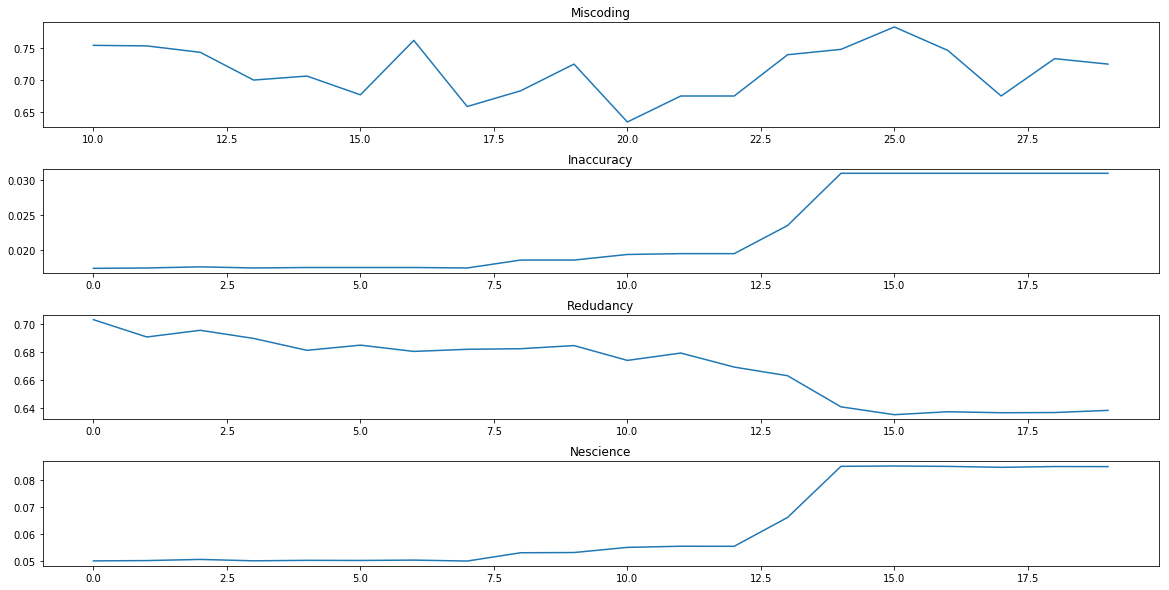

In [55]:
fig, axs = plt.subplots(4, gridspec_kw={'hspace': 0.4, 'wspace': 0})
axs[0].plot(np.arange(10, 30), lmiscoding)
axs[0].set_title('Miscoding')
axs[1].plot(linaccuracy)
axs[1].set_title('Inaccuracy')
axs[2].plot(lredudancy)
axs[2].set_title('Redudancy')
axs[3].plot(lnescience)
axs[3].set_title('Nescience')

The minimum nescience achieved is

In [56]:
min(lnescience)

0.049796744658509175

And so, the optimal number of samples at leafs should be

In [57]:
10 + np.where(lnescience == min(lnescience))[0][0]

17

Compare the result with the classical way to do this kind of things.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
lscore  = list()

for i in np.arange(10, 30):
    
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    tree.fit(X_train, y_train)
    
    score = tree.score(X_test, y_test)
    
    lscore.append(score)

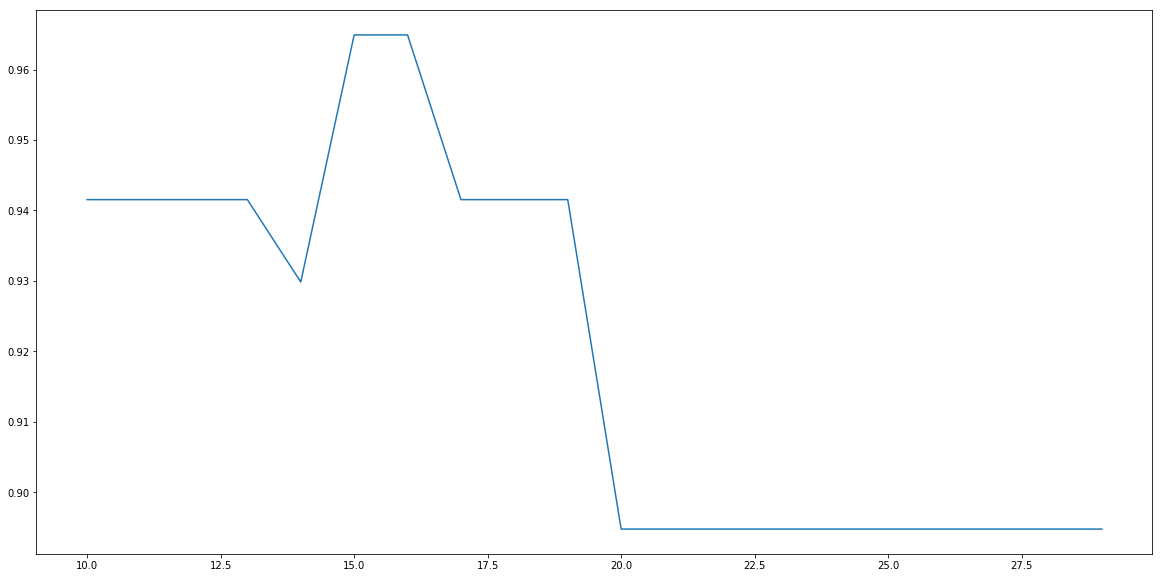

In [61]:
plt.plot(np.arange(10, 30), lscore)

In [62]:
max(lscore)

0.9649122807017544

In [63]:
10 + np.where(lscore == max(lscore))[0][0]

15